In [13]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt

In [14]:
# Load settings from config.yaml
with open("config.yaml", 'r') as file:
    config = yaml.safe_load(file)

In [15]:
cs_historical_data_path = config['general']['data']['cs_historical_data_path']
data = pd.read_csv(cs_historical_data_path, parse_dates=['Date'])

In [16]:
# Step 1: Get the circulating supply as of 30th November 2024
current_data = data[data["Date"] == "2024-11-30"]
current_circulating_supply = current_data["Circulating Supply"].iloc[0] 

# Step 2: Calculate the remaining circulating supply for Dec 2024 - Apr 2025
forecasted_circulating_supply_2024_2025 = config['calculate_future_circulating_supply']['forecasted_circulating_supply']['year_2024_2025']
remaining_circulating_supply_2024_2025 = forecasted_circulating_supply_2024_2025 - current_circulating_supply

# Distribute the remaining supply across Dec 2024 - Apr 2025
months_2024_2025 = pd.date_range(start="2024-12-01", end="2025-04-30", freq="MS")
monthly_increment_2024_2025 = remaining_circulating_supply_2024_2025 / len(months_2024_2025)

# Create daily data for Dec 2024 - Apr 2025
future_data_2024_2025 = []
monthly_supply = current_circulating_supply

for month_start in months_2024_2025:
    monthly_supply += monthly_increment_2024_2025
    daily_dates = pd.date_range(start=month_start, end=month_start + pd.offsets.MonthEnd(0), freq="D")
    for day in daily_dates:
        future_data_2024_2025.append({
            "Date": day,
            "Circulating Supply": monthly_supply
        })

future_data_2024_2025 = pd.DataFrame(future_data_2024_2025)


In [17]:
# Step 1: Get the circulating supply as of 30th April 2025
april_2025_data = future_data_2024_2025[future_data_2024_2025["Date"] == "2025-04-30"]
circulating_supply_april_2025 = april_2025_data["Circulating Supply"].iloc[0]

# Step 2: Forecasted CS for May 2025 - April 2026
forecasted_circulating_supply_2025_2026 = config['calculate_future_circulating_supply']['forecasted_circulating_supply']['year_2025_2026']
remaining_circulating_supply_2025_2026 = (
    forecasted_circulating_supply_2025_2026 - circulating_supply_april_2025
)

# Distribute the remaining supply across 12 months (May 2025 - April 2026)
months_2025_2026 = pd.date_range(start="2025-05-01", end="2026-04-30", freq="MS")
monthly_increment_2025_2026 = remaining_circulating_supply_2025_2026 / len(months_2025_2026)

# Create daily data for May 2025 - April 2026
future_data_2025_2026 = []
monthly_supply = circulating_supply_april_2025

for month_start in months_2025_2026[:12]:  # May 2025 - April 2026
    monthly_supply += monthly_increment_2025_2026
    daily_dates = pd.date_range(start=month_start, end=month_start + pd.offsets.MonthEnd(0), freq="D")
    for day in daily_dates:
        future_data_2025_2026.append({
            "Date": day,
            "Circulating Supply": monthly_supply
        })

# Step 3: Combine with previous data
future_data_2025_2026 = pd.DataFrame(future_data_2025_2026)


In [18]:
# Step 1: Get the circulating supply as of 30th April 2026
april_2026_data = future_data_2025_2026[future_data_2025_2026["Date"] == "2026-04-30"]
circulating_supply_april_2026 = april_2026_data["Circulating Supply"].iloc[0]

# Step 2: Forecasted CS for May 2026 - April 2027
forecasted_circulating_supply_2026_2027 = config['calculate_future_circulating_supply']['forecasted_circulating_supply']['year_2026_2027']
remaining_circulating_supply_2026_2027 = (
    forecasted_circulating_supply_2026_2027 - circulating_supply_april_2026
)

# Distribute the remaining supply across 12 months (May 2026 - April 2027)
months_2026_2027 = pd.date_range(start="2026-05-01", end="2027-04-30", freq="MS")
monthly_increment_2026_2027 = remaining_circulating_supply_2026_2027 / len(months_2026_2027)

# Create daily data for May 2026 - April 2027
future_data_2026_2027 = []
monthly_supply = circulating_supply_april_2026

for month_start in months_2026_2027:
    monthly_supply += monthly_increment_2026_2027
    daily_dates = pd.date_range(start=month_start, end=month_start + pd.offsets.MonthEnd(0), freq="D")
    for day in daily_dates:
        future_data_2026_2027.append({
            "Date": day,
            "Circulating Supply": monthly_supply
        })

# Convert to DataFrame
future_data_2026_2027 = pd.DataFrame(future_data_2026_2027)


In [19]:
future_data = pd.concat([future_data_2024_2025, future_data_2025_2026, future_data_2026_2027], ignore_index=True)

In [20]:
future_cs_data_path = config['general']['data']['cs_future_data_path']
future_data.to_csv(future_cs_data_path, index=False)

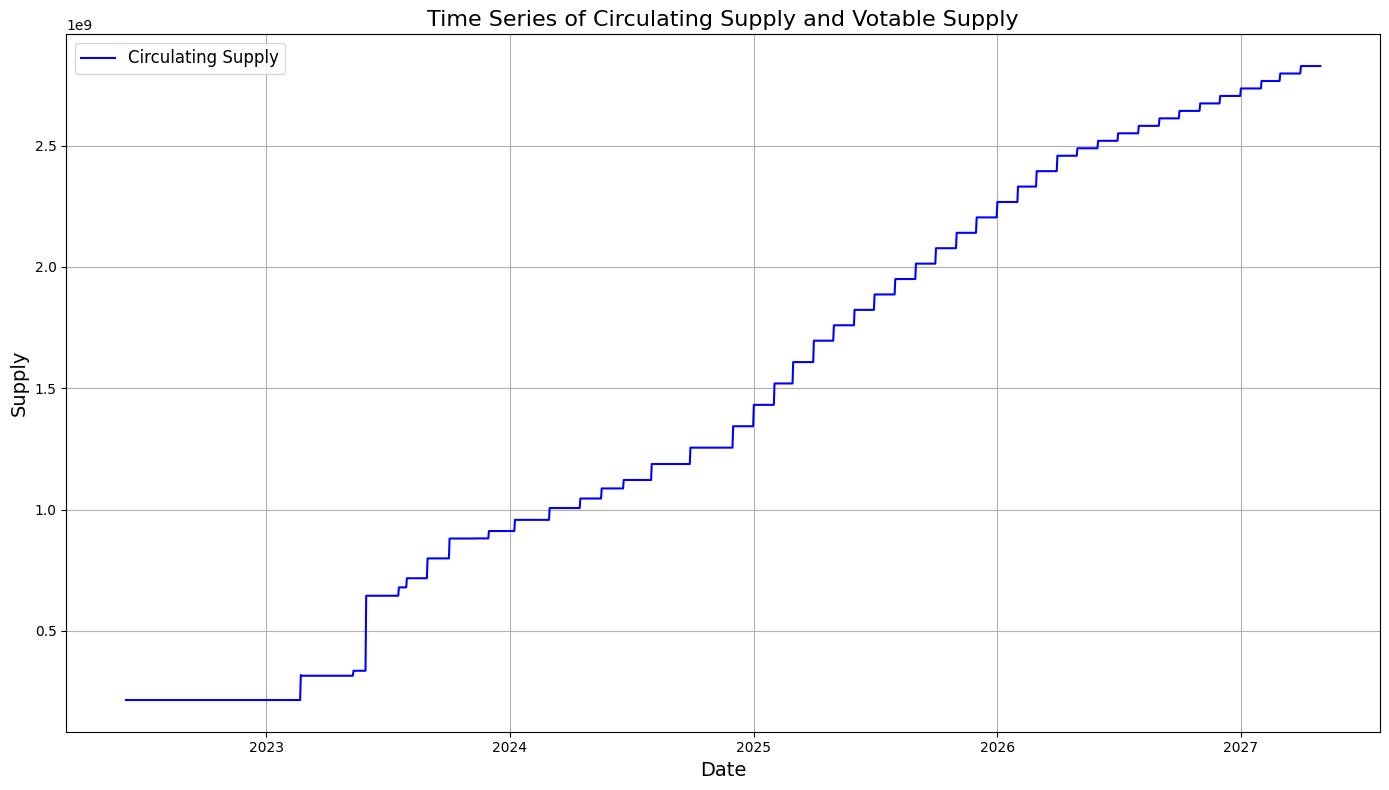

In [21]:
# Combine with all previous data
all_data = pd.concat([data, future_data_2024_2025, future_data_2025_2026, future_data_2026_2027], ignore_index=True)

all_data = all_data.sort_values(by="Date").reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))

# Plot Circulating Supply
plt.plot(all_data["Date"], all_data["Circulating Supply"], label="Circulating Supply", color="blue")

# Adding titles and labels
plt.title("Time Series of Circulating Supply and Votable Supply", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Supply", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
